# The Effect of Languages on Movies: The Multi-Faceted Story of a Single Parameter

## Data Preprocessing Pipeline
- Clean up the prefix and suffix of some columns
- Overview of data information, e.g. data type, missing data
- Combine Mojo dataset with the original data to improve the situation with a lot of missing revenue data

In [1]:
import numpy as np
import pandas as pd
import re
import ast

In [2]:
# Change the file path for the file movie.metadata.tsv
file_path = "movie.metadata.tsv"

In [3]:
# Reading the file into a pandas dataframe
movie_summaries = pd.read_csv(file_path, sep="\t", header=None)
movie_summaries.columns = ["Wikipedia movie ID",
 "Freebase_movie_ID",
 "Movie_name",
 "Movie_release_date",
 "Movie_box_office_revenue",
 "Movie_runtime",
 "Movie_languages",
 "Movie_countries",
 "Movie_genres"]
movie_summaries.head()

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Remove prefix '/m/'
movie_summaries['Freebase_movie_ID'] = movie_summaries['Freebase_movie_ID'].str.replace('/m/', '')

In [5]:
# Create new columns for languages, countries and genres
# The data type of the new columns is list containing all possible values
# Only take the values into account for now,
# If we need the code for further analysis, just apply x.keys() instead of x.values()

movie_summaries['Movie_languages_clean'] = movie_summaries['Movie_languages'].apply(ast.literal_eval).apply(lambda x: list(x.values()))
movie_summaries['Movie_countries_clean'] = movie_summaries['Movie_countries'].apply(ast.literal_eval).apply(lambda x: list(x.values()))
movie_summaries['Movie_genres_clean'] = movie_summaries['Movie_genres'].apply(ast.literal_eval).apply(lambda x: list(x.values()))

In [6]:
# Extract the release year
# This column only contains the years
movie_summaries['Movie_release_year'] = movie_summaries['Movie_release_date'].str.extract(r'(\d{4})')

# Convert strings to datetime values if there are
# For the rows with only years, the value is replaced by NaT
# pd.to_datetime has a bug if the format provided is more "precise" than what is in the dataframe, it has default values and will not
# raise an error or replace with NaT
# specifically %Y-%m-%d with year 2000 defaults to 2000-01-01, even with the exact=True argument.
movie_summaries['Movie_release_date_datetime'] = movie_summaries['Movie_release_date'].astype('str').apply(
        lambda x: pd.to_datetime(x if "-" in x else pd.NaT, errors="coerce")
)

In [7]:
movie_summaries.head()

,Wikipedia movie ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_languages_clean,Movie_countries_clean,Movie_genres_clean,Movie_release_year,Movie_release_date_datetime
0,975900,03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2001-08-24
1,3196793,08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000,2000-02-16
2,28463795,0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988,NaT
3,9363483,0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987,NaT
4,261236,01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],1983,NaT


In [8]:
# Add mojo box office dataset
import requests
from bs4 import BeautifulSoup

In [9]:
def getData(year):
    url = f'https://www.boxofficemojo.com/year/{year}/?sortDir=asc&sort=rank&grossesOption=totalGrosses'

    # Send a GET request to the URL
    response = requests.get(url)

    df = pd.DataFrame()
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extract relevant information (modify this based on the structure of the webpage)
        # Example: Extracting movie titles
        df['movie_title'] = [title.text.strip() for title in soup.find_all('td', class_='a-text-left mojo-field-type-release mojo-cell-wide')]
        df['movie_revenue'] = [title.text.strip() for title in soup.find_all('td', class_='a-text-right mojo-field-type-money mojo-estimatable')]


    return df

In [10]:
# Uncomment if you need to re-write the data from the website

# df_all = pd.DataFrame()

# Python range is not inclusive for the second value
# for i in range(1977, 2024):
#    temp = getData(i)
#    df_all = pd.concat([df_all, temp], ignore_index=True)

# Write to csv
# df_all.to_csv('mojo_data.csv', header=None, index=False)

In [11]:
# Reading the file into a pandas dataframe
df_all = pd.read_csv('mojo_data.csv', header=None)
df_all.columns = ["movie_title",
 "movie_revenue"]
df_all.head()

,movie_title,movie_revenue
0,Star Wars: Episode IV - A New Hope,"$307,263,857"
1,Smokey and the Bandit,"$126,737,428"
2,Close Encounters of the Third Kind,"$116,395,460"
3,Saturday Night Fever,"$94,213,184"
4,A Bridge Too Far,"$50,750,000"


In [12]:
# We can just always consider the original dataset, and replace the missing revenues with the ones from the Mojo dateset

# Drop duplicate movies, based on name only
df_all = df_all.drop_duplicates(subset=['movie_title'])
movie_summaries = movie_summaries.drop_duplicates(subset=['Movie_name'])
# Merge dataframes based on the movie name, left join so we keep all of the original data
merged_df = pd.merge(movie_summaries, df_all, right_on='movie_title', left_on='Movie_name', how='left')

# Drop the extra column (either 'movie_title' or 'Movie_name') if needed
# merged_df = merged_df.drop('movie_title', axis=1)

# Cleaning up the revenues

# Remove the dollar sign and commas
merged_df['movie_revenue'] = merged_df['movie_revenue'].astype(str).str.replace('$', '').str.replace(',', '')

# Convert the column to floats
merged_df['movie_revenue'] = merged_df['movie_revenue'].astype(float)

# Create a boolean mask for rows where movie_revenue is NaN and gross_revenue is not NaN
mask = (pd.isna(merged_df['Movie_box_office_revenue'])) & (~pd.isna(merged_df['movie_revenue']))

# Replace missing values in Movie_box_office_revenue with movie_revenue
merged_df.loc[mask, 'Movie_box_office_revenue'] = merged_df.loc[mask, 'movie_revenue']

## Q1: Does language variety mean more box office revenue?
The purpose of this section is to investigate the possible correlation between the box office revenue and the number of languages presented in a movie. First, we determine the length of the language list, assigning a value of zero if the list is empty. In addition, we eliminate all NaN values, especially given our initial investigation which revealed a considerable amount of missing data in the movie revenue. At the end, we have in total 8401 useful entries to analyse.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Count the number of languages in a movie
# Create a new column
df = merged_df.copy(deep=True)
df.info()
df['language_count'] = df['Movie_languages_clean'].apply(len)
df_language_count = df[['Movie_name', 'Movie_box_office_revenue', 'language_count']].dropna()
df_language_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75478 entries, 0 to 75477
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Wikipedia movie ID           75478 non-null  int64         
 1   Freebase_movie_ID            75478 non-null  object        
 2   Movie_name                   75478 non-null  object        
 3   Movie_release_date           68978 non-null  object        
 4   Movie_box_office_revenue     9376 non-null   float64       
 5   Movie_runtime                56345 non-null  float64       
 6   Movie_languages              75478 non-null  object        
 7   Movie_countries              75478 non-null  object        
 8   Movie_genres                 75478 non-null  object        
 9   Movie_languages_clean        75478 non-null  object        
 10  Movie_countries_clean        75478 non-null  object        
 11  Movie_genres_clean           75478 non-nu

#### Language Count Distribution
We focus on the number of languages and try to understand the distribution of languages. The plot shows that the majority of films (76.56% of non-NaN data in box office revenue) have only one language. This presents a challenge for further analysis as it indicates a significant imbalance in the data set when examining language diversity.

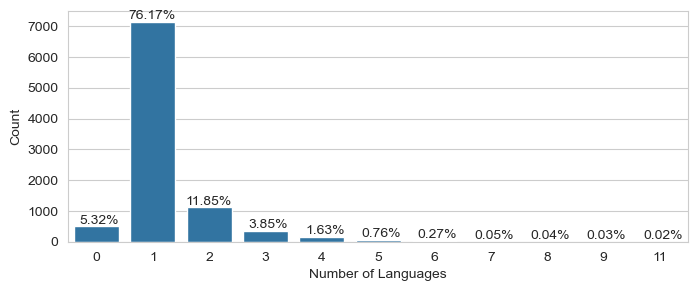

In [15]:
plt.figure(figsize=(8,3))
ax = sns.countplot(df_language_count, x='language_count')
ax.set(xlabel='Number of Languages', ylabel='Count')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/float(len(df_language_count)))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='bottom')

#### Box Office Revenue Distribution
The box office revenue data have some extreme values. To improve the clarity and interpretability of the distribution in our visualizations, we use a logarithmic scale.

Text(0.5, 0, 'Box Office Revenue\n(Log Scale)')

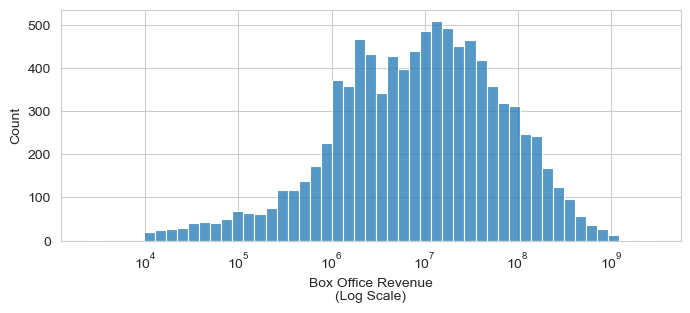

In [16]:
plt.figure(figsize=(8,3))
sns.histplot(df_language_count, x='Movie_box_office_revenue', log_scale=True)
plt.xlabel('Box Office Revenue\n(Log Scale)')

#### Box Office Revenue v.s. Number of Languages
We want to examine the correlation between these two variables. While this visualization suggests a trend towards higher box office results for more languages, it is important to note that the comparison may not be meaningful due to unequal data sizes across language groups.

Text(0, 0.5, 'Box Office Revenue\n(Log Scale)')

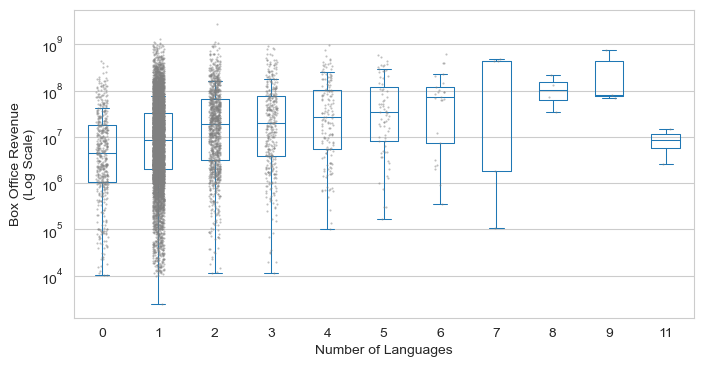

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(df_language_count, y='Movie_box_office_revenue', x='language_count', fill=False, width=.5, linewidth=.75, showfliers=False)
sns.stripplot(df_language_count, y='Movie_box_office_revenue', x='language_count', size=1.5, log_scale=True, color='grey', alpha=0.5)
plt.xlabel('Number of Languages')
plt.ylabel('Box Office Revenue\n(Log Scale)')

### What's next?
- Find a way to deal with this imbalanced data
- Also consider other potential confounders affecting the box revenue and maybe a combined analysis with other variables
    - Such using an external movie budget dataset
- Do a hypothesis test:
    - Calculate the correlation coefficient and its associated p-value
    - **Null Hypothesis (H0):** There is no correlation between the number of languages and box revenue.
    - **Alternative Hypothesis (H1):** There is a correlation between the number of languages and box revenue.